# Testing SDC 
---

Sdc1
- maestro.use_tfromp = false                                                                                
- maestro.dpdt_factor = 1. 

Sdc2
- maestro.use_tfromp = false                                                                                
- maestro.dpdt_factor = 0.    

Sdc3
- maestro.use_tfromp = true                                                                                
- maestro.dpdt_factor = 1.    

Sdc4
- maestro.use_tfromp = true                                                                                
- maestro.dpdt_factor = 0.                                  


In [1]:
import yt
import numpy as np
import glob
import matplotlib.pyplot as plt
from yt.funcs import mylog
mylog.setLevel(40) # Gets rid of all of the yt info text, only errors.

In [2]:
sdc1 = glob.glob("sdctest/sdc1*")
sdc2 = glob.glob("sdctest/sdc2*")
sdc3 = glob.glob("sdctest/sdc3*")
sdc4 = glob.glob("sdctest/sdc4*")

sdcs = [sdc1, sdc2, sdc3, sdc4]

In [3]:
sdc1 = np.sort(sdc1)[1:len(sdc1)-3]#Cut initdata/initproj/divuinte
sdc2 = np.sort(sdc2)[1:len(sdc2)-3]
sdc3 = np.sort(sdc3)[1:len(sdc3)-3]
sdc4 = np.sort(sdc4)[1:len(sdc4)-3]

In [4]:
#Derived Fields for diff of TfromP from TfromH
def DiffOfTs(field,data):
    return data["tfromp"] - data["tfromh"]

yt.add_field(("gas", "DiffOfTs"), function=DiffOfTs)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


---
# Max(DiffofTs):
The max of DiffofTs over the whole data set, as a function of time

In [5]:
def get_extrema(file_list):
    maxx = []
    minn = []
    times = []
    for file in sdc1:
        ds = yt.load(file)
        ad = ds.all_data()
        extreme = ad.quantities.extrema("DiffOfTs")
        minn.append(extreme[0])
        maxx.append(extreme[1])
        times.append(ds.current_time)
    return times, minn, maxx


In [6]:
t1, min1, max1 = get_extrema(sdc1)
t2, min2, max2 = get_extrema(sdc2)
t3, min3, max3 = get_extrema(sdc3)
t4, min4, max4 = get_extrema(sdc4)

Text(0.5, 1.0, 'Max over domain of (TfromP-TfromH) over time')

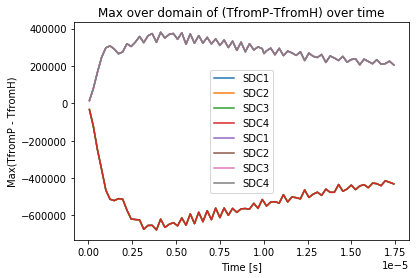

In [7]:
plt.plot(t1, min1, label = 'SDC1')
plt.plot(t2, min2, label = 'SDC2')
plt.plot(t3, min3, label = 'SDC3')
plt.plot(t4, min4, label = 'SDC4')

plt.plot(t1, max1, label = 'SDC1')
plt.plot(t2, max2, label = 'SDC2')
plt.plot(t3, max3, label = 'SDC3')
plt.plot(t4, max4, label = 'SDC4')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,3))
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Max(TfromP - TfromH)")
plt.title("Max over domain of (TfromP-TfromH) over time")

In [8]:
from yt import derived_field

---
# Avg(DiffofTs)
Average of DiffofTs over the whole data set, as a function of time

In [9]:
def get_averages(file_list):
    aver = []
    times = []
    for file in sdc1:
        ds = yt.load(file)
        ad = ds.all_data()
        aver.append( (ad["DiffOfTs"].sum() / ad["DiffOfTs"].size) )
        times.append(ds.current_time)
    return times, aver

In [10]:
t1, aver1 = get_averages(sdc1)
t2, aver2 = get_averages(sdc2)
t3, aver3 = get_averages(sdc3)
t4, aver4 = get_averages(sdc4)

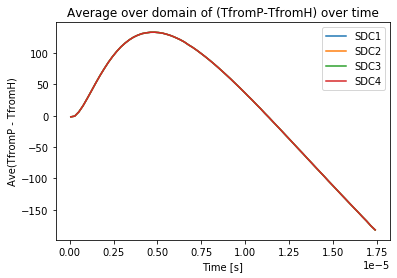

In [11]:
plt.plot(t1, aver1, label = 'SDC1')
plt.plot(t2, aver2, label = 'SDC2')
plt.plot(t3, aver3, label = 'SDC3')
plt.plot(t4, aver4, label = 'SDC4')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,3))
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Ave(TfromP - TfromH)")
plt.title("Average over domain of (TfromP-TfromH) over time");

---
# Sliceplots 
Where are the differences? These are from ~ midway through the simulation that we ran. 

In [12]:
def make_slice(file_list):
    ds = yt.load(file)
    yt.SlicePlot(ds, 'x', "DiffOfTs").show()


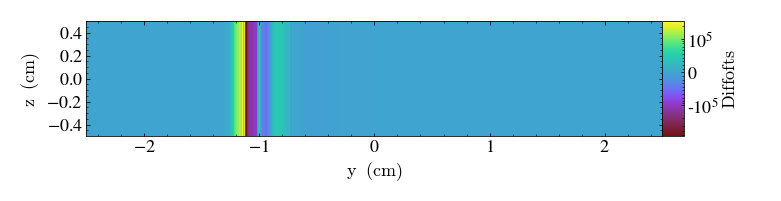


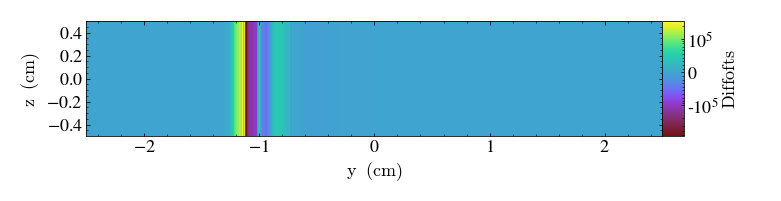


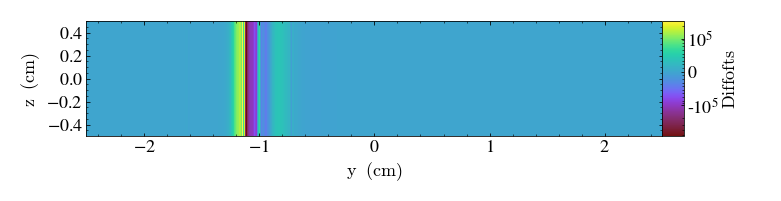


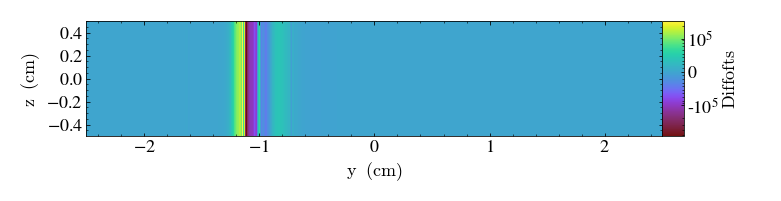

In [13]:
middle_plot_index = round(len(sdc1)/2)
middles = [sdc1[middle_plot_index], sdc2[middle_plot_index], sdc3[middle_plot_index], sdc4[middle_plot_index]]
for file in middles:
    make_slice(file)

--- 
# Conclusions:
There are almost no differences in sdc1,2,3,4? 

Also, TfromP - TfromH can go up to 10 orders of maginitude in differnce in the flame.